 # **Gaining meaningful insights based on youtube data**





In [ ]:
#Importing the dataset directly from kaggle

import kagglehub

# Download latest version
path= kagglehub.dataset_download("surajjha101/top-youtube-channels-data")

print("Path to dataset files:", path)

100%|██████████| 27.9k/27.9k [00:00<00:00, 31.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/surajjha101/top-youtube-channels-data/versions/2


## Loading the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os




In [ ]:
df=pd.read_csv(os.path.join(path, 'most_subscribed_youtube_channels.csv'))
df.head(5)

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013


## Data Cleaning:
### Renaming the columns for better understanding

In [ ]:
df.rename(columns = {"rank":"Rank","Youtuber":"Channel","subscribers":"Subscribers","video views":"Views","video count":"Videos_uploaded","category":"Category","started":"Creation_year"},inplace = True)

In [ ]:
df= df.set_index("Rank")
df.head(5)

,Channel,Subscribers,Views,Videos_uploaded,Category,Creation_year
Rank,,,,,,
1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
5,Music,"116,000,000",0,0,NaN,2013


##  Checking for null values

In [ ]:
df.isna().sum()

,0
Channel,0
Subscribers,0
Views,0
Videos_uploaded,0
Category,27
Creation_year,0


## Dropping the null values across the category column

In [ ]:
df.dropna(axis = 0,subset = ["Category"],inplace= True)

**df.info()** -provides a check to find for any null values.

While running this command you will observe that all the field entries are non-null.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 1 to 1000
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Channel          973 non-null    object
 1   Subscribers      973 non-null    object
 2   Views            973 non-null    object
 3   Videos_uploaded  973 non-null    object
 4   Category         973 non-null    object
 5   Creation_year    973 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 53.2+ KB


**df.info()** also provides with the datatype of each column and it can be found that most are of the object type which needs to be changed to integer type for gaining insights from it.

In [ ]:
df["Subscribers"] = [value.replace(",","")for value in df["Subscribers"]]

df["Views"] = [value.replace(",","")for value in df["Views"]]

df["Videos_uploaded"] = [value.replace(",","")for value in df["Videos_uploaded"]]


#Changing the datatype from object to int64

df["Subscribers"] = df["Subscribers"].astype("int64")

df["Views"] = df["Views"].astype("int64")

df["Videos_uploaded"] = df["Videos_uploaded"].astype("int64")

## Verifying the Columns post conversion to integer datatype using df.info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 1 to 1000
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Channel          973 non-null    object
 1   Subscribers      973 non-null    int64 
 2   Views            973 non-null    int64 
 3   Videos_uploaded  973 non-null    int64 
 4   Category         973 non-null    object
 5   Creation_year    973 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 53.2+ KB


Rows where 'Views' or 'Subscribers' were zero were removed to improve the quality and reliability of the analysis.


In [ ]:
df = df[df["Views"] != 0]
df = df[df["Subscribers"] != 0]

In [ ]:
df.head()

,Channel,Subscribers,Views,Videos_uploaded,Category,Creation_year
Rank,,,,,,
1,T-Series,222000000,198459090822,17317,Music,2006
3,Cocomelon - Nursery Rhymes,140000000,135481339848,786,Education,2006
4,SET India,139000000,125764252686,91271,Shows,2006
6,PewDiePie,111000000,28469458228,4497,Gaming,2010
7,MrBeast,102000000,16832456681,726,Entertainment,2012


# Lets do some Analytics!

## What could be the best insight we can gain from such data? Lets find out by computing certain metrics like:

1.Subscriber-to-View Efficiency Ratio

2.Upload Frequency vs Subscribers

3.Category Dominance

4.Growth Potential Index




### 1.Subscriber-to-View Efficiency Ratio

Formula:
 Efficiency = Total Views / Total Subscribers




In [ ]:
df['Efficiency'] = df['Views'] / df['Subscribers']



In [ ]:
# Gives the channels with highest efficiency
df.sort_values("Efficiency", ascending=False).head(10)


,Channel,Subscribers,Views,Videos_uploaded,Category,Creation_year,Efficiency
Rank,,,,,,,
234,netd müzik,22800000,50658927334,20482,Music,2014,2221.882778
980,Inside Edition,11000000,19367966533,27156,News & Politics,2012,1760.724230
105,Ryan's World,32900000,51721734476,2198,Entertainment,2015,1572.089194
741,Tsuriki Show,12700000,19472063469,1617,Entertainment,2019,1533.233344
686,jbalvinVEVO,13300000,19691312985,235,Music,2010,1480.549848
958,FunToys Collector Disney Toys Review,11100000,15050447314,2910,Entertainment,2011,1355.896154
315,LankyBox,19600000,25787517689,5545,Comedy,2016,1315.689678
565,Maroon5VEVO,14600000,18917303323,143,Music,2009,1295.705707
616,MalumaVEVO,14100000,17905081262,168,Music,2011,1269.863919


In [ ]:
# Gives the channels with lowest efficiency
df.sort_values("Efficiency").head(10)

,Channel,Subscribers,Views,Videos_uploaded,Category,Creation_year,Efficiency
Rank,,,,,,,
535,НТВ,14900000,439098,1,People & Blogs,2008,0.029470
907,YtCrash,11400000,3825084,1,Education,2015,0.335534
705,Calon Sarjana,13000000,10664585,29,Entertainment,2016,0.820353
649,NOBRU,13700000,225191097,344,Gaming,2016,16.437306
885,FrontaL Gaming,11700000,255073454,108,Gaming,2015,21.801150
300,Vevo,20000000,546905035,1519,Music,2006,27.345252
685,YOLO,13400000,638326662,117,Comedy,2015,47.636318
408,Stubborn Facts,17300000,827786482,217,Film & Animation,2016,47.848930
482,Apple,15900000,808136104,205,Science & Technology,2005,50.826170


In [ ]:
#categorically efficient channels
category_efficiency = (
    df.groupby("Category")
    .apply(lambda x: x["Views"].sum() / x["Subscribers"].sum())
    .sort_values(ascending=False)
)

category_efficiency

/tmp/ipython-input-1175048033.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x["Views"].sum() / x["Subscribers"].sum())


,0
Category,
Shows,796.305255
Music,568.251834
Education,555.298815
Pets & Animals,511.210489
News & Politics,492.842166
Film & Animation,465.167042
Sports,464.136829
Entertainment,455.693855
Trailers,428.476340


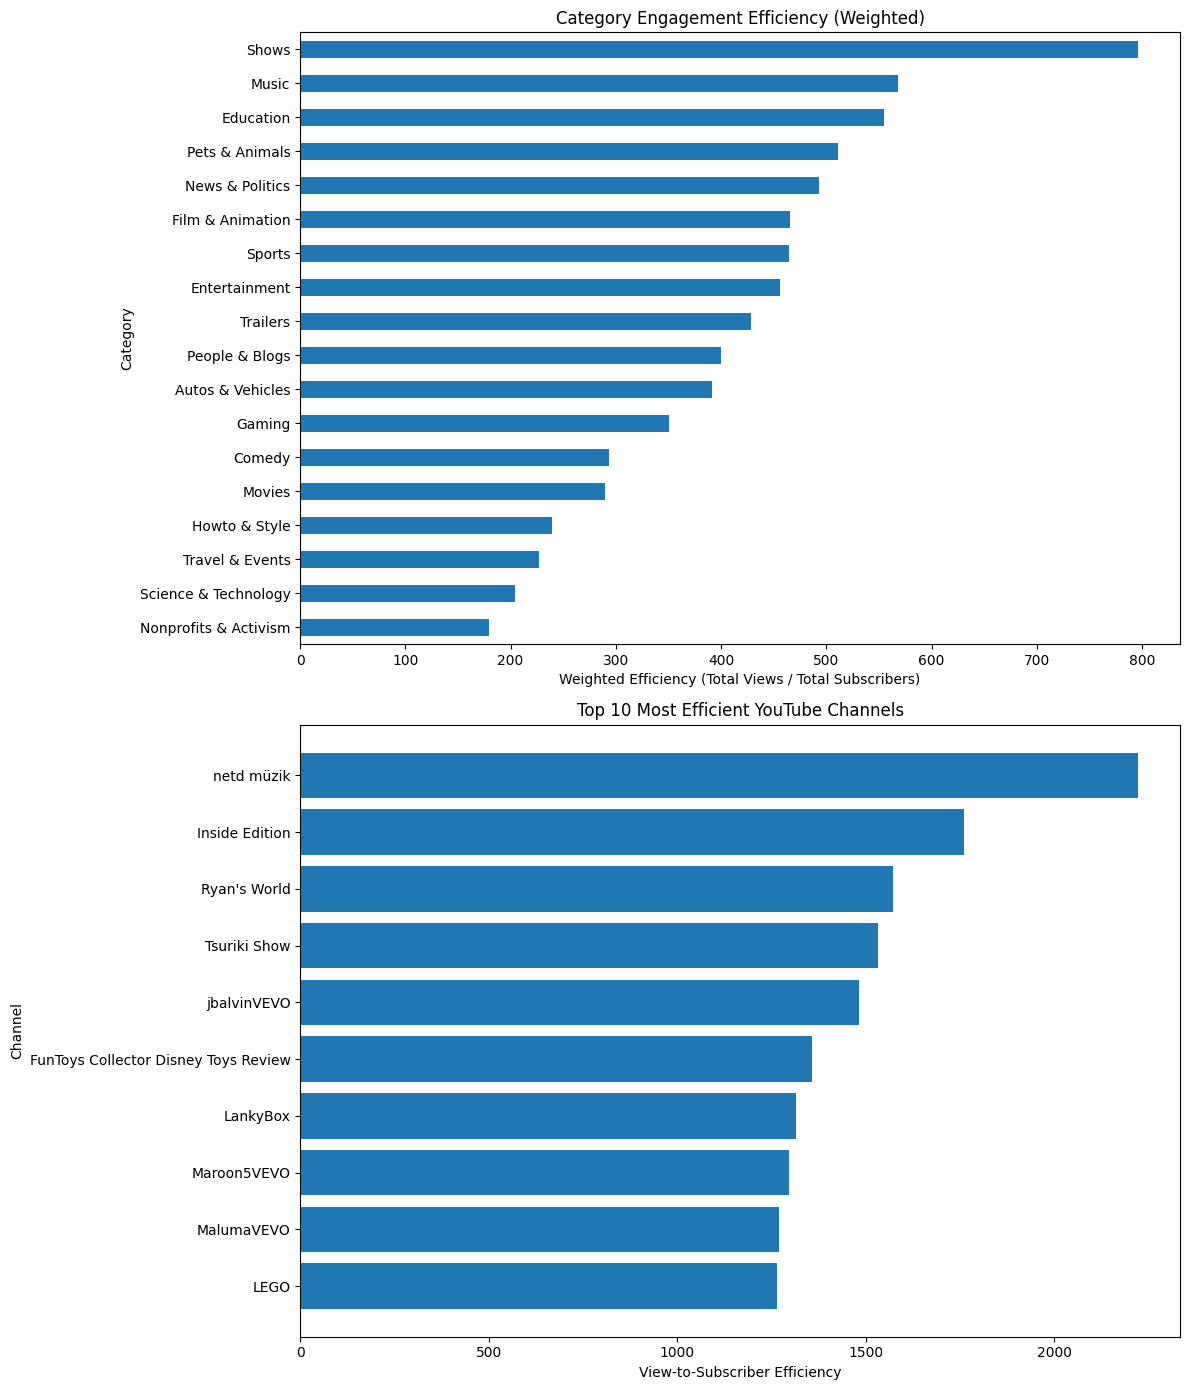

In [ ]:
import matplotlib.pyplot as plt

category_eff = (
    df.groupby("Category")["Views"].sum() /
    df.groupby("Category")["Subscribers"].sum()
).sort_values(ascending=False)

top10 = df.sort_values("Efficiency", ascending=False).head(10)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,14))

category_eff.sort_values().plot(
    kind="barh",
    ax=axes[0]
)
axes[0].set_xlabel("Weighted Efficiency (Total Views / Total Subscribers)")
axes[0].set_ylabel("Category")
axes[0].set_title("Category Engagement Efficiency (Weighted)")

axes[1].barh(top10["Channel"], top10["Efficiency"])
axes[1].set_xlabel("View-to-Subscriber Efficiency")
axes[1].set_ylabel("Channel")
axes[1].set_title("Top 10 Most Efficient YouTube Channels")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


The Subscriber-to-View Efficiency Ratio helps in understanding


*   Which channels convert subscribers into actual viewers
*   Which category has higher engagement power

 We find that **TV shows and music** convert subscribers into repeat viewership more effectively than mass-appeal and thus we can find youtube channels like netd müzik , Inside edition being highly efficient




## 2.Upload Frequency vs Subscribers


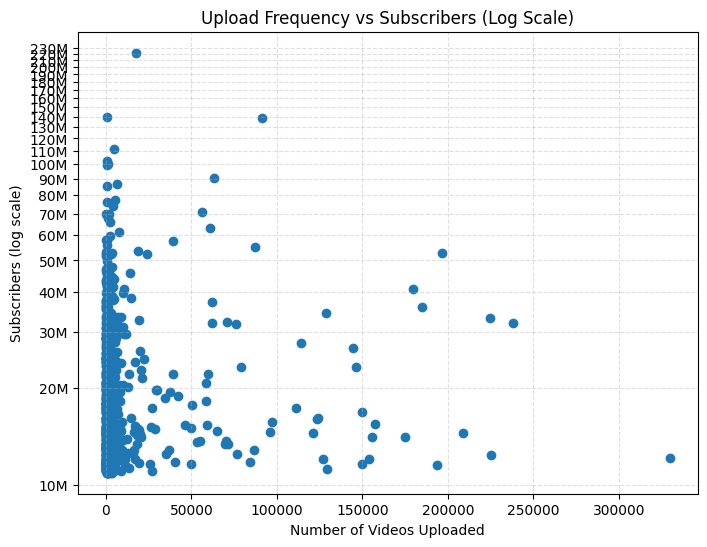

In [ ]:

plt.figure(figsize=(8,6))
plt.scatter(df["Videos_uploaded"], df["Subscribers"])
plt.yscale("log")
plt.xlabel("Number of Videos Uploaded")
plt.ylabel("Subscribers (log scale)")
plt.title("Upload Frequency vs Subscribers (Log Scale)")
max_subs = df["Subscribers"].max()
ticks = np.arange(10_000_000, max_subs + 10_000_000, 10_000_000)

plt.yticks(ticks)

def format_m(x, pos):
    return f"{int(x/1_000_000)}M"

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_m))

plt.grid(True, linestyle="--", alpha=0.4)


The Upload Frequency vs Subscribers metric helps us to understand how fast growth occurs with every video upload and the rate of subscriber.
The above scatter plot  highlights that content impact often outweighs upload frequency.


## 3.Category Dominance

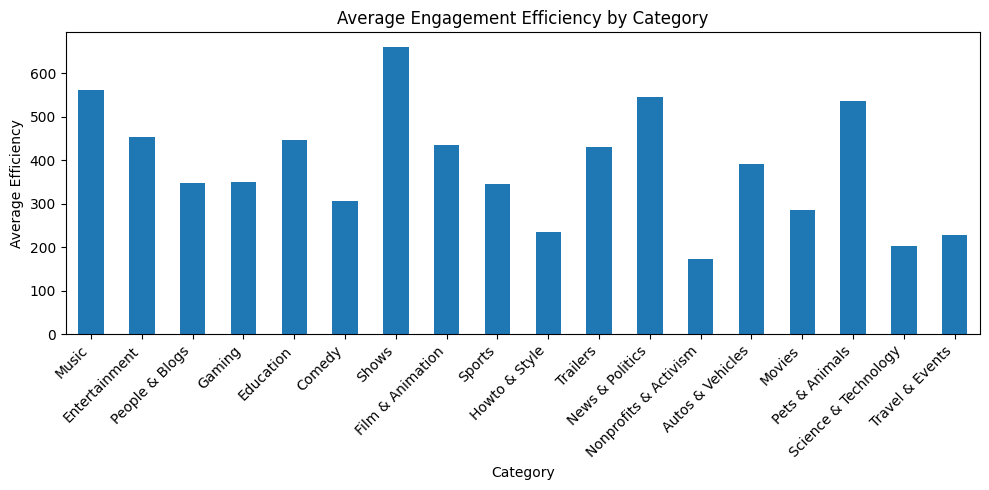

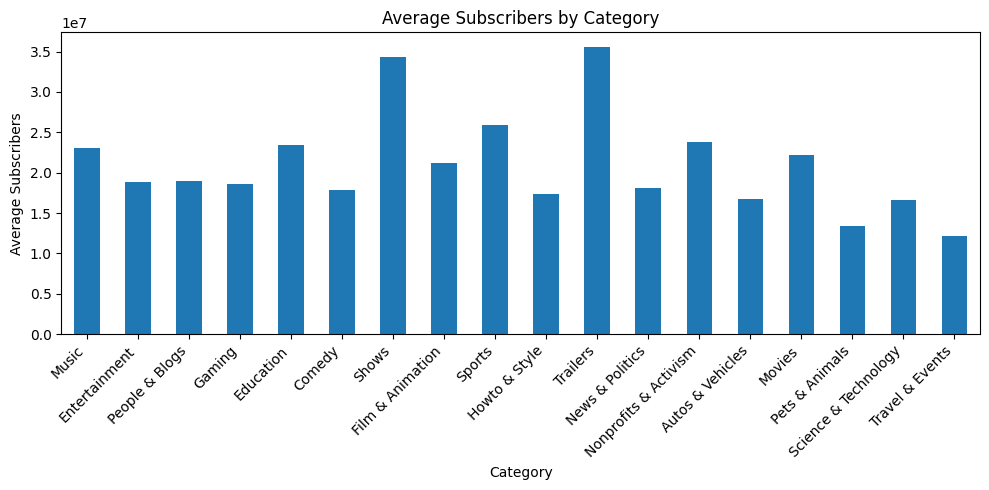

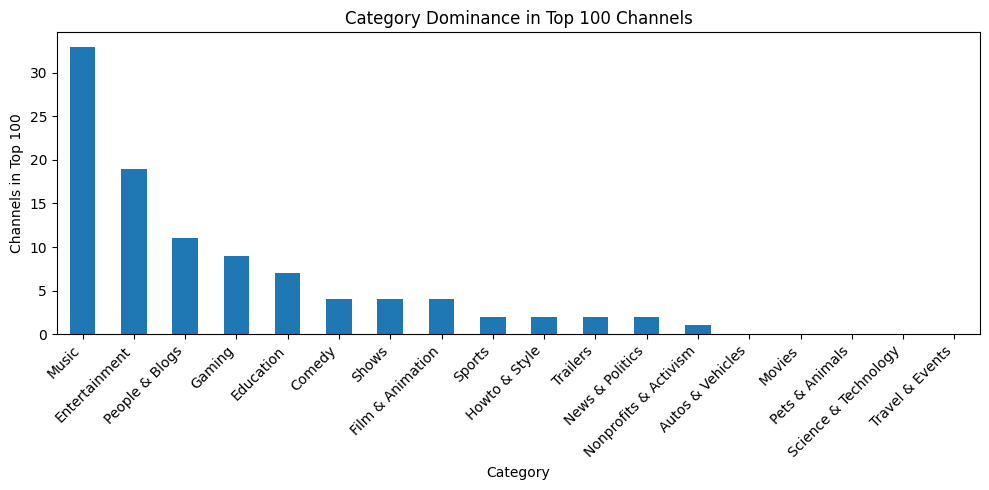

In [ ]:
top100 = df.sort_values("Subscribers", ascending=False).head(100)

top100_category_counts = top100["Category"].value_counts()

subscribers_by_category = df.groupby("Category")["Subscribers"].mean()

category_efficiency = df.groupby("Category")["Efficiency"].mean()

category_summary = pd.DataFrame({
    "Top100_Count": top100_category_counts,
    "Avg_Subscribers": subscribers_by_category,
    "Avg_Efficiency": category_efficiency
}).fillna(0)

order = category_summary["Top100_Count"].sort_values(ascending=False).index

#Plot: Average Efficiency

category_summary.loc[order, "Avg_Efficiency"].plot(
    kind="bar",
    figsize=(10,5)
)
plt.ylabel("Average Efficiency")
plt.title("Average Engagement Efficiency by Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#Plot: Average Subscribers
category_summary.loc[order, "Avg_Subscribers"].plot(
    kind="bar",
    figsize=(10,5)
)
plt.ylabel("Average Subscribers")
plt.title("Average Subscribers by Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#Plot: Top 100 Category Dominance
category_summary.loc[order, "Top100_Count"].plot(
    kind="bar",
    figsize=(10,5)
)
plt.ylabel("Channels in Top 100")
plt.title("Category Dominance in Top 100 Channels")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Here we are able to find that **Music and Entertainment** exhibit the highest level of subscription, engagement and they hugely dominate among other categories.

## 4.Growth Potential Index

### Calculated using Growth Index = (Subscribers / Years Active) * (Views / Uploads)


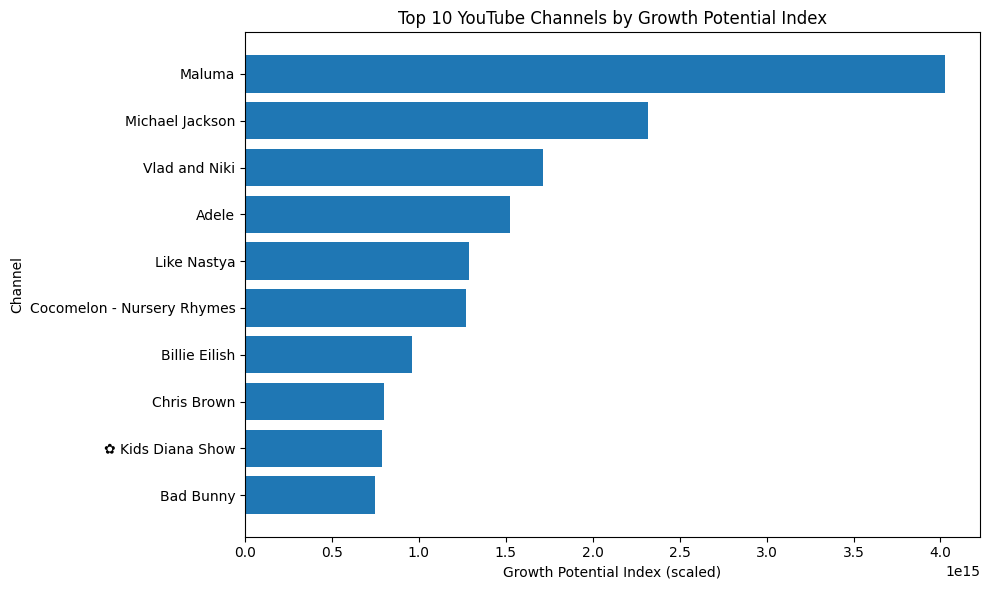

In [ ]:
current_year = 2025

df["Years_Active"] = current_year - df["Creation_year"]
df = df[(df["Years_Active"] > 0) & (df["Videos_uploaded"] > 0)]
df["Growth_Index"] = (
    (df["Subscribers"] / df["Years_Active"]) *
    (df["Views"] / df["Videos_uploaded"])
)
df.sort_values("Growth_Index", ascending=False)[
    ["Channel", "Growth_Index", "Subscribers", "Views", "Videos_uploaded", "Years_Active"]
].head(10)
import matplotlib.pyplot as plt

top_gpi = df.sort_values("Growth_Index", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_gpi["Channel"], top_gpi["Growth_Index"])
plt.xlabel("Growth Potential Index (scaled)")
plt.ylabel("Channel")
plt.title("Top 10 YouTube Channels by Growth Potential Index")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


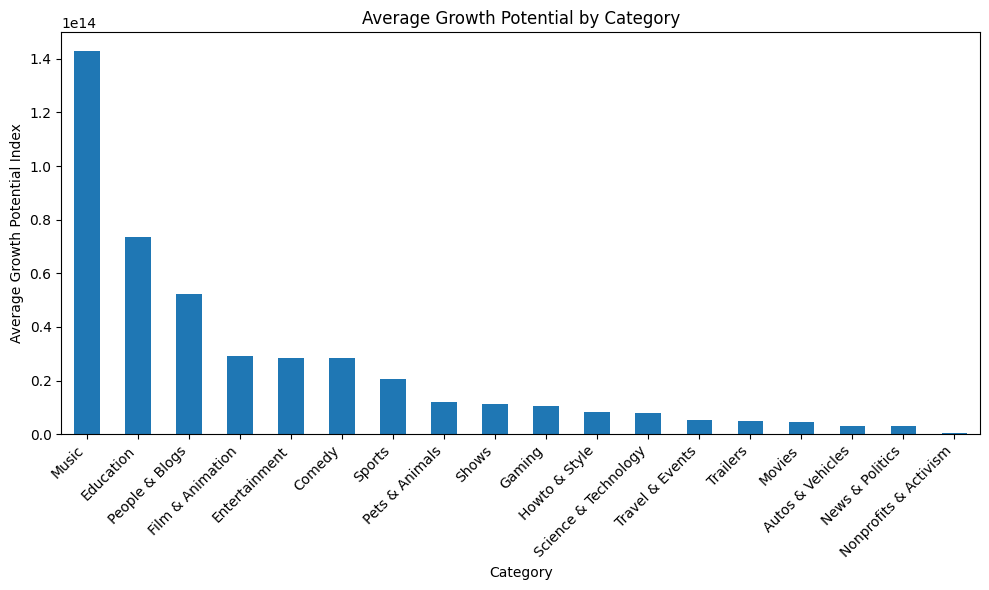

In [ ]:
category_gpi = (
    df.groupby("Category")["Growth_Index"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
category_gpi.plot(kind="bar")
plt.ylabel("Average Growth Potential Index")
plt.title("Average Growth Potential by Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Growth Potential Index estimates which channel is growing fastest relative to effort. The **music** channels have seen ever green potential of growing faster
The Growth Potential Index helps distinguish between mature channels and emerging high-growth creators

